In [3]:
#!pip install citipy

In [28]:
# WeatherPy
#----

#### Note
#* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lat=[]
lng=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]
name1=[]
city_id=[]
x=0
country=[]
units="metric"

#Loodk for city in cities data frame in openweathermap and create new dataframe
# Build query URL

for city in cities[:600]:
    query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units="+ units
    response = requests.get(query_url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max']) 
        humidity.append(response['main']['humidity'])
            
        cloudiness.append(response['clouds']['all'])    
            
        wind_speed.append(response['wind']['speed'])                                 
        date.append(response['dt'])
        country.append(response['sys']['country'])
       
        city_id=response['id']
        name=response['name']
        name1.append(response['name'])

        print(f"Printing record: {city_id}| {name}")    
    
    except KeyError:
        print("City not found...skipping")
              
  
              
print(f"-------")    
print(f"Data Retrieval complete") 



                       
                        
                        
    


Printing record: 3985710| Cabo San Lucas
Printing record: 5557293| Sitka
Printing record: 1006984| East London
Printing record: 2487130| Sidi Ali
City not found...skipping
Printing record: 3374083| Bathsheba
Printing record: 6170031| Tuktoyaktuk
Printing record: 3874787| Punta Arenas
Printing record: 4030556| Rikitea
Printing record: 6201424| Mataura
Printing record: 3995652| Mocorito
Printing record: 3833367| Ushuaia
Printing record: 2094027| Kieta
Printing record: 2128975| Nemuro
Printing record: 964406| Port Shepstone
Printing record: 2075265| Busselton
Printing record: 1213855| Sibolga
Printing record: 3418910| Upernavik
Printing record: 3652758| Puerto Baquerizo Moreno
Printing record: 5122534| Jamestown
Printing record: 55671| Kismayo
Printing record: 5855927| Hilo
Printing record: 2022572| Khatanga
Printing record: 3448453| São Miguel do Iguaçu
City not found...skipping
Printing record: 6165406| Thompson
City not found...skipping
Printing record: 6050066| La Ronge
Printing recor

City not found...skipping
Printing record: 5955902| Fort Nelson
Printing record: 2641434| Northam
Printing record: 3489440| Morant Bay
Printing record: 5983720| Iqaluit
Printing record: 3039162| Sant Julià de Loria
Printing record: 3421765| Nanortalik
Printing record: 2312895| Mbandaka
City not found...skipping
Printing record: 576260| Bisert'
Printing record: 5887798| Assiniboia
Printing record: 5364271| Laguna
Printing record: 2127202| Anadyr
Printing record: 2021041| Kyra
Printing record: 3092472| Malbork
Printing record: 2120591| Tilichiki
Printing record: 3981069| Tres Palos
Printing record: 2015306| Tiksi
Printing record: 767605| Krasnystaw
City not found...skipping
Printing record: 2986626| Plouzané
City not found...skipping
Printing record: 3932145| Pisco
Printing record: 3131824| Vigrestad
Printing record: 5866583| Saint Paul Harbor
Printing record: 3441665| Minas
Printing record: 1067565| Beloha
Printing record: 3372964| Lagoa
Printing record: 3414079| Olafsvik
Printing recor

Printing record: 364933| Umm Kaddadah
Printing record: 6451497| Hyères
Printing record: 1797117| Rongcheng
Printing record: 1252753| Yelbarga
Printing record: 1226260| Trincomalee
Printing record: 6112862| Preeceville
Printing record: 967106| Oudtshoorn
City not found...skipping
Printing record: 136256| Dezful
Printing record: 1790437| Zhuhai
Printing record: 5117949| Freeport
Printing record: 3935102| Mazamari
Printing record: 497547| Selty
Printing record: 962367| Richards Bay
Printing record: 3129839| Aras
Printing record: 1497337| Kayerkan
Printing record: 647751| Lohja
Printing record: 741160| Oltu
Printing record: 949703| Thaba Nchu
Printing record: 3684666| El Carmen de Bolívar
Printing record: 945945| Upington
Printing record: 3412093| Vestmannaeyjar
Printing record: 3628473| San Cristobal
Printing record: 5563839| Fortuna
Printing record: 3386177| Trairi
Printing record: 2016680| Shirokiy
Printing record: 3385077| Conde
Printing record: 1490256| Talnakh
Printing record: 502738

In [ ]:
### Convert Raw Data to DataFrame
#* Export the citydata into a .csv.
#* Display the DataFrame

In [4]:
city_data={"Name": name1,"lat": lat,"long": lng, "Max Temp":temp_max,"Humidity": humidity, "Cloudiness": cloudiness, "Date":date,"Wind Speed":wind_speed,"Country":country}
city_data1=pd.DataFrame(city_data)
city_data1.head()
#len(city_data1.Name)
city_data1.to_csv("city_data2.csv", encoding="utf-8")

In [5]:
city_data1.loc[city_data1['Humidity']> 100]

,Name,lat,long,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country


In [6]:
## Inspect the data and remove the cities where the humidity > 100%.

#Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#response

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
city_data1.head()

,Name,lat,long,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country
0,Cabo San Lucas,22.89,-109.91,28.89,83,5,1603246391,5.70,MX
1,Sitka,57.05,-135.33,6.00,75,75,1603246656,1.58,US
2,East London,-33.02,27.91,14.16,66,0,1603246656,2.46,ZA
3,Sidi Ali,36.10,0.42,21.62,28,100,1603246656,7.56,DZ
4,Bathsheba,13.22,-59.52,28.00,78,40,1603246656,3.60,BB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

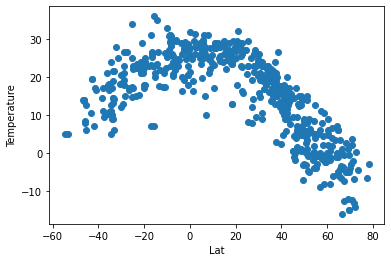

In [12]:
plt.scatter(city_data1.lat, city_data1['Max Temp'])
plt.xlabel('Lat')
plt.ylabel('Temperature')
plt.savefig('LatvsTemp.png')
plt.show()

## Latitude vs. Humidity Plot

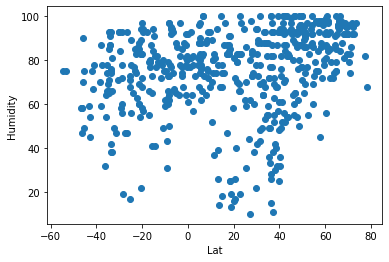

In [13]:
plt.scatter(city_data1.lat, city_data1.Humidity)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.savefig('LatvsHumidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

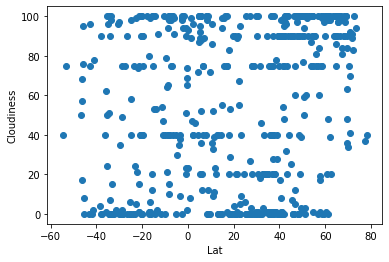

In [14]:
plt.scatter(city_data1.lat, city_data1.Cloudiness)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig('LatvsCloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

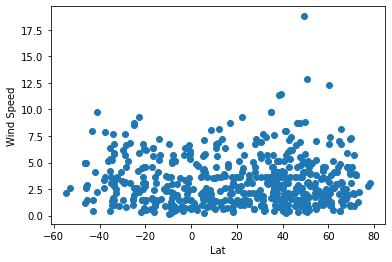

In [15]:
plt.scatter(city_data1.lat, city_data1['Wind Speed'])
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.savefig('LatvsWindSpeed.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

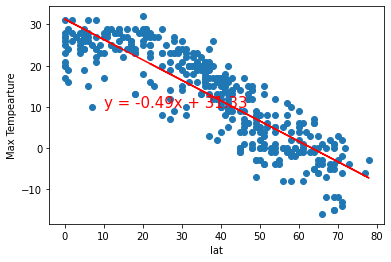

<Figure size 1080x1080 with 0 Axes>

The r value is: -0.8705433342119205


In [16]:
condition = city_data1['lat'].astype(int) >= 0
north_hem1=city_data1.where(condition)
north_hem=north_hem1.dropna()
x_value=north_hem['lat'].astype(int)
y_value=north_hem['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_values = x_value*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('Max Tempearture')
plt.figure(figsize=(15,15))
plt.savefig('NorthLatvsTemplinReg.png')
plt.show()


print(f"The r value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

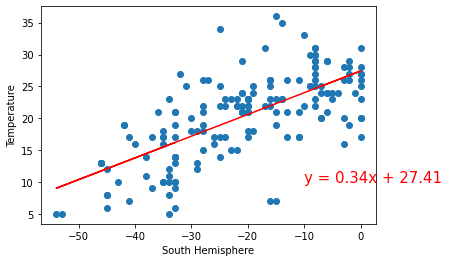

The r value is: 0.6812487659752599


In [17]:
condition1 = city_data1.lat <0
south_hem1=city_data1.where(condition1)
south_hem=south_hem1.dropna()

x_value1 =south_hem['lat'].astype(int)
y_value1=south_hem['Max Temp'].astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value1, y_value1)

regress_values1 = x_value1*slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value1, y_value1)
plt.plot(x_value1,regress_values1,"r-")
plt.annotate(line_eq1,(-10,10),fontsize=15,color="red")



plt.xlabel('South Hemisphere')
plt.ylabel('Temperature')
plt.savefig('SouthLatvsTemplinReg.png')
plt.show()
#south_hem
print(f"The r value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

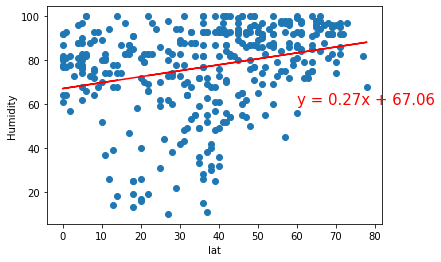

<Figure size 1080x1080 with 0 Axes>

The r value is: 0.26724004664141277


In [18]:
x_value3=north_hem['lat'].astype(int)
y_value3=north_hem['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value3, y_value3)

regress_values3 = x_value3*slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value3, y_value3)
plt.plot(x_value3,regress_values3,"r-")
plt.annotate(line_eq3,(60,60),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('Humidity')
plt.figure(figsize=(15,15))
plt.savefig('NorthLatvsHumiditylinReg.png')
plt.show()
print(f"The r value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

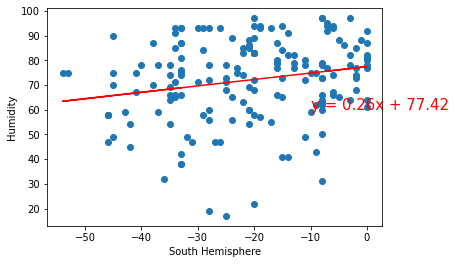

The r value is: 0.21096523554920665


In [19]:
south_hem=south_hem1.dropna()

x_value4 =south_hem['lat'].astype(int)
y_value4=south_hem['Humidity'].astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value4, y_value4)

regress_values4 = x_value4*slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value4, y_value4)
plt.plot(x_value4,regress_values4,"r-")
plt.annotate(line_eq4,(-10,60),fontsize=15,color="red")



plt.xlabel('South Hemisphere')
plt.ylabel('Humidity')
plt.savefig('SoutLatvsHumiditylinReg.png')
plt.show()
#south_hem
print(f"The r value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

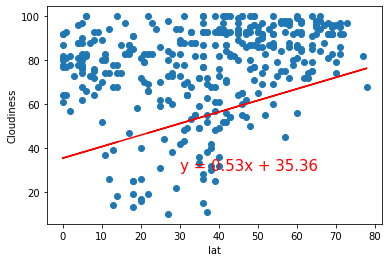

<Figure size 1080x1080 with 0 Axes>

The r value is: 0.2639256439159263


In [20]:
x_value5=north_hem['lat'].astype(int)
y_value5=north_hem['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value5, y_value5)

regress_values5 = x_value5*slope + intercept
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value5, y_value3)
plt.plot(x_value5,regress_values5,"r-")
plt.annotate(line_eq5,(30,30),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('Cloudiness')
plt.figure(figsize=(15,15))
plt.savefig('NorthLatvsCloudinesslinReg.png')
plt.show()
print(f"The r value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

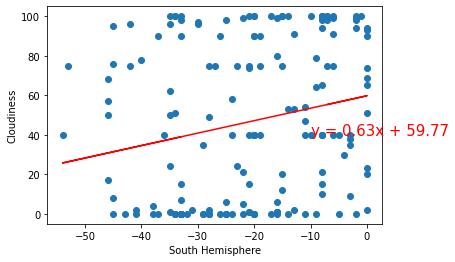

The r value is: 0.2133433495259965


In [21]:
south_hem=south_hem1.dropna()

x_value6 =south_hem['lat'].astype(int)
y_value6=south_hem['Cloudiness'].astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value6, y_value6)

regress_values6 = x_value6*slope + intercept
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value6, y_value6)
plt.plot(x_value6,regress_values6,"r-")
plt.annotate(line_eq6,(-10,40),fontsize=15,color="red")



plt.xlabel('South Hemisphere')
plt.ylabel('Cloudiness')
plt.savefig('SouthLatvsCloudinesslinReg.png')
plt.show()

print(f"The r value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

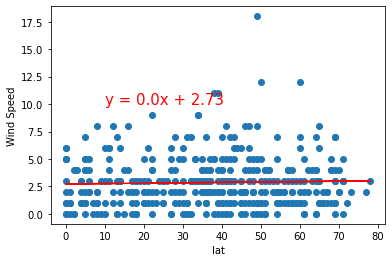

<Figure size 1080x1080 with 0 Axes>

The r value is: 0.030704360506888264


In [22]:
x_value7=north_hem['lat'].astype(int)
y_value7=north_hem['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value7, y_value7)

regress_values7 = x_value7*slope + intercept
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value7, y_value7)
plt.plot(x_value7,regress_values7,"r-")
plt.annotate(line_eq7,(10,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('Wind Speed')
plt.figure(figsize=(15,15))
plt.savefig('NorthLatvsWindSpeedlinReg.png')
plt.show()
print(f"The r value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

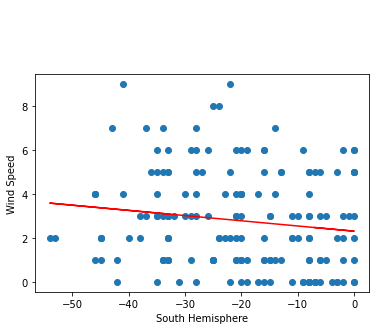

The r value is: -0.14466239880905196


In [23]:
south_hem=south_hem1.dropna()

x_value8 =south_hem['lat'].astype(int)
y_value8=south_hem['Wind Speed'].astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value8, y_value8)

regress_values8 = x_value8*slope + intercept
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value8, y_value8)
plt.plot(x_value8,regress_values8,"r-")
plt.annotate(line_eq8,(-50,12),fontsize=15,color="red")



plt.xlabel('South Hemisphere')
plt.ylabel('Wind Speed')
plt.savefig('SouthLatvsWindSpeedlinReg.png')

plt.show()

print(f"The r value is: {rvalue}")


#data Analysis: Observations
1. As the latitude increases in North Hemisphere the temperature decreased as indicated by linear regression line.
2. As the latiude decreased further in South Hemispherer temprature also decreased as indicated by line
3. wind speed was between 2 -6 for most of the cities.
